In [16]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

def get_calibration(calibration_images):

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    
    img_size = None

    # Step through the list and search for chessboard corners
    for fname in calibration_images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_size = gray.shape[::-1]

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

    return cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

cv2.destroyAllWindows()

In [11]:
import cv2
class CalibratedCamera():

    def __init__(self, ret, mtx, dist, rvecs, tvecs):
        self.ret = ret
        self.mtx = mtx
        self.dist = dist
        self.rvecs = rvecs
        self.tvecs = tvecs

    def undistort_img(self, img):
        return cv2.undistort(img, self.mtx, self.dist, None, self.mtx)

In [8]:
image_fnames = glob.glob('./camera_cal/calibration*.jpg')
ret, mtx, dist, rvecs, tvecs = get_calibration(image_fnames)


In [12]:
camera = CalibratedCamera(ret, mtx, dist, rvecs, tvecs)

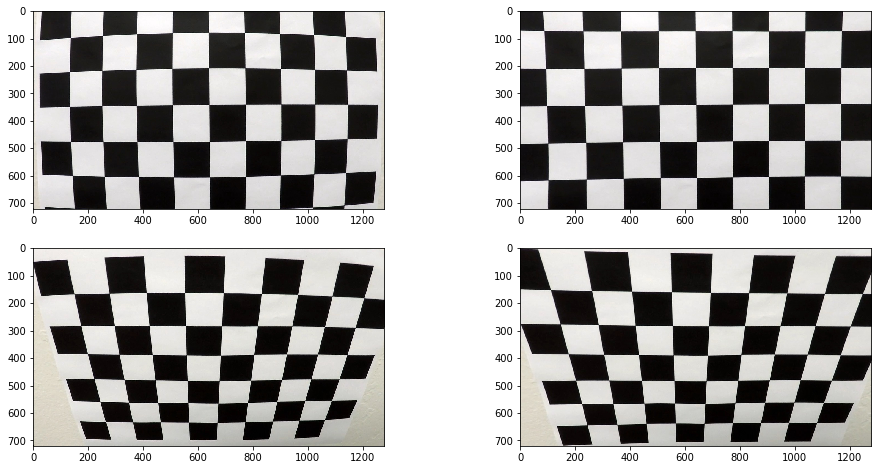

In [19]:
test_img1 = cv2.imread('./camera_cal/calibration1.jpg')
test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_BGR2RGB)
test_img2 = cv2.imread('./camera_cal/calibration2.jpg')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)
undistored_test_img1 = camera.undistort_img(test_img1)
undistored_test_img2 = camera.undistort_img(test_img2)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
ax = ax.ravel()

ax[0].imshow(test_img1)
ax[1].imshow(undistored_test_img1)
ax[2].imshow(test_img2)
ax[3].imshow(undistored_test_img2)